X Shape
(768, 8)
LR: 0.766969 (0.035426)
LDA: 0.773496 (0.034665)
KNN: 0.721377 (0.044168)
CART: 0.708305 (0.063855)
NB: 0.756494 (0.033037)
SVM: 0.651059 (0.003418)
DT: 0.701811 (0.058545)
RF: 0.763072 (0.050721)
EV: 0.766934 (0.053114)


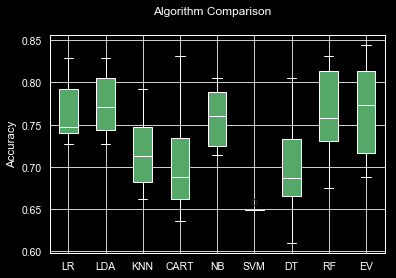

In [9]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline
plt.style.use('dark_background')


def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
print("X Shape")
print(X.shape)
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('EV',EloVoter(n_estimators=100, k=10)))

#models.append(('RF', RandomForestClassifier(random_state=42, n_estimators=100)))
#models.append(('LV', Liquid_Voter(random_state=42, n_estimators=100)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
#plt.boxplot(results, )
draw_plot(results, 'w', 'g')
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.show()


In [54]:
import itertools
elo = Implementation(k=42)
for i in range(1,100):
    elo.addPlayer(i)
print(elo.getPlayerRating(1))
combs = [comb for comb in itertools.combinations(range(1,100),2)]
#np.random.shuffle(combs)
for comb in combs:
    #print(comb)
    #print(elo.getPlayerRating(comb[0]),elo.getPlayerRating(comb[1]))
    elo.recordMatch(comb[0], comb[1], winner=comb[0])
    #print(elo.getPlayerRating(comb[0]))
    #print('~'*50)


1000


array([1536, 1528, 1520, 1512, 1504, 1497, 1489, 1481, 1474, 1466, 1458,
       1451, 1443, 1435, 1427, 1420, 1412, 1404, 1396, 1387, 1379, 1371,
       1362, 1354, 1345, 1337, 1328, 1319, 1310, 1301, 1291, 1282, 1273,
       1263, 1253, 1243, 1233, 1223, 1212, 1202, 1191, 1180, 1169, 1158,
       1147, 1135, 1123, 1111, 1099, 1087, 1074, 1061, 1048, 1035, 1021,
       1008,  994,  979,  965,  950,  935,  920,  904,  889,  872,  856,
        839,  822,  805,  788,  770,  751,  733,  714,  695,  675,  655,
        635,  614,  594,  572,  551,  529,  506,  484,  461,  437,  413,
        389,  365,  340,  315,  289,  263,  237,  210,  183,  156,  128])

In [ ]:
import matplotlib.pyplot as plt
from numpy.linalg import LinAlgError
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'grey'
#Setup Subplots

#for i, ax in enumerate(axs.flatten()):
base_ratings = [500, 1000, 2000]    
k = [0.01, 0.1, 1, 10, 100]
total = 0
for prod in itertools.product(base_ratings, k):
    total +=1
print(total)
n_cols = float(5)
nrows = int(total/n_cols)
fig, axs = plt.subplots(nrows, int(n_cols), figsize=(20,10))

c = 0
for prod in itertools.product(base_ratings, k):
    base_rating_ = prod[0]
    k_ = prod[1]
    print(prod)
    ax = axs.flatten()[c]
    c += 1
    ev.elo = Implementation(k=k_, base_rating=base_rating_)
    for i, est in enumerate(ev.ensemble.estimators_):
        ev.elo.addPlayer(i)
    combs = [comb for comb in itertools.combinations(range(ev.n_estimators), 2)]
    np.random.shuffle(combs)
    for comb in combs:
        pred_a = ev.predictions[comb[0]]
        pred_b = ev.predictions[comb[1]]
#             print(len(pred_a[np.logical_xor(pred_a,pred_b)]), 
#                   len(np.logical_xor(pred_a,pred_b)))
        wins_a = np.logical_and(pred_a[np.logical_xor(pred_a,pred_b)], ev.y_valid[np.logical_xor(pred_a,pred_b)]).sum()
        wins_b = np.logical_and(pred_b[np.logical_xor(pred_a,pred_b)], ev.y_valid[np.logical_xor(pred_a,pred_b)]).sum()
        draws = len(ev.y_valid) - wins_a - wins_b
        for w in range(wins_a):
            ev.elo.recordMatch(comb[0], comb[1], winner=comb[0])
        for w in range(wins_b):
            ev.elo.recordMatch(comb[0], comb[1], winner=comb[1])
        for w in range(draws):
            ev.elo.recordMatch(comb[0], comb[1], draw=True)
    import pandas as pd
    ss = pd.Series([elo_[1] for elo_ in ev.elo.getRatingList()])
    #print(ss)
    try:
        ss.plot(kind='hist', ax=ax)
        ax.set_title('K: %s Base Rating: %s'% (str(k_), str(base_rating_)))
    except LinAlgError:
        print("LINEAR ALGEBRA ERROR WITH FEAT %s" % col)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels)


15
(500, 0.01)
(500, 0.1)


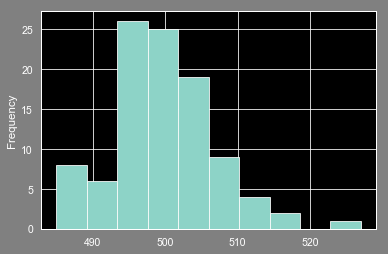

In [45]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils import check_X_y, check_random_state, check_array
from sklearn.metrics import get_scorer, accuracy_score
from sklearn.utils.validation import column_or_1d, check_is_fitted
from sklearn.multiclass import check_classification_targets
from sklearn.utils.metaestimators import if_delegate_has_method
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from elopy import Implementation
import itertools
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
class EloVoter(BaseEstimator, ClassifierMixin):
    """
    Elo Voter delegation mechanism. It builds a standard random forest but
    votes according to the elo scores of the estimators.
    """
    def __init__(self, 
                 ensemble=RandomForestClassifier(), 
                 n_estimators=100,  
                 random_state=42,
                 #competence = 'valid_acc',
                 valid_size = 0.1,
                 base_rating = 1000,
                 k = 42,
                 cv = None,
                 metric='accuracy'):  
        self.n_estimators = n_estimators
        self.random_state = check_random_state(random_state)
        self.ensemble = ensemble.set_params(**{'random_state':self.random_state,
                                            'n_estimators':self.n_estimators})
        self.base_rating = base_rating
        self.k = k
        self.cv = cv
        self.scoring = get_scorer(metric)
        #self.competence = competence
        self.valid_size = valid_size
        self.elo = Implementation(k=self.k, base_rating=self.base_rating)
        self.predictions = []
    
    def fit(self, X, y):
        return self._fit(X, y)
    
    def _validate_y(self, y):
        y = column_or_1d(y, warn=True)
        check_classification_targets(y)
        self.classes_, y = np.unique(y, return_inverse=True)
        self.n_classes_ = len(self.classes_)
        return y
    
    def _fit(self,X,y):
        X, y = check_X_y(
            X, y, ['csr', 'csc'], dtype=None, force_all_finite=False,
            multi_output=True)
        y = self._validate_y(y)
        n_samples, self.n_features_ = X.shape
        if self.cv == None:
            X_train, X_valid, y_train, y_valid = train_test_split(X, y,random_state= self.random_state,
                             test_size = self.valid_size)
            self.ensemble.fit(X_train, y_train)
            self.y_valid = y_valid
            from collections import defaultdict
            import operator
            for i, est in enumerate(self.ensemble.estimators_):
                self.elo.addPlayer(i)
                self.predictions.append(est.predict(X_valid))
        else:
            self.ensemble.fit(X, y)
            for i, est in enumerate(self.ensemble.estimators_):
                self.elo.addPlayer(i)
                cv_fold = StratifiedKFold(self.cv, random_state=self.random_state)
                self.predictions.append(cross_val_predict(est, X, y, cv=cv_fold))
                self.y_valid = y
        combs = [comb for comb in itertools.combinations(range(self.n_estimators), 2)]
        np.random.shuffle(combs)
        for comb in combs:
            pred_a = self.predictions[comb[0]]
            pred_b = self.predictions[comb[1]]
#             print(len(pred_a[np.logical_xor(pred_a,pred_b)]), 
#                   len(np.logical_xor(pred_a,pred_b)))
            wins_a = np.logical_and(pred_a[np.logical_xor(pred_a,pred_b)], self.y_valid[np.logical_xor(pred_a,pred_b)]).sum()
            wins_b = np.logical_and(pred_b[np.logical_xor(pred_a,pred_b)], self.y_valid[np.logical_xor(pred_a,pred_b)]).sum()
            draws = len(self.y_valid) - wins_a - wins_b
            for w in range(wins_a):
                self.elo.recordMatch(comb[0], comb[1], winner=comb[0])
            for w in range(wins_b):
                self.elo.recordMatch(comb[0], comb[1], winner=comb[1])
            for w in range(draws):
                self.elo.recordMatch(comb[0], comb[1], draw=True)
        self.ensemble.fit(X, y)
        return self
    
    
    def _validate_y(self, y):
        y = column_or_1d(y, warn=True)
        check_classification_targets(y)
        self.classes_, y = np.unique(y, return_inverse=True)
        self.n_classes_ = len(self.classes_)
        return y
    
    def predict(self, X):
        """Predict class for X.
        The predicted class of an input sample is computed as the class with
        the highest mean predicted probability. If base estimators do not
        implement a ``predict_proba`` method, then it resorts to voting.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        y : array of shape = [n_samples]
            The predicted classes.
        """
        
        return self.predict_delegate_(X)
    
    def predict_delegate_(self, X):
        import collections
        final_pred = []
        voting_hands = np.array([int(elo_[1]) for elo_ in self.elo.getRatingList()])
        print(sorted(voting_hands))
        for sample in xrange(X.shape[0]):
            sample_pred = []
            for est_id, est in enumerate(self.ensemble.estimators_):
                est_predict = est.predict(X[sample,:].reshape(1, -1))[0]
                sample_pred.extend([est_predict for i in xrange(voting_hands[est_id])])
            final_pred.append(collections.Counter(sample_pred).most_common()[0][0])
        return np.array(final_pred)  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, Y, random_state=42, test_size=0.3)

                                        
ev = EloVoter(n_estimators=100, k=200, cv=)
ev.fit(X_train,y_train)
pred = ev.predict(X_test)
print(accuracy_score(y_test, pred))

[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999]
0.7619047619047619


array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.